# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
api_key = "d3c4faafb9d0a7f951ebd7b08a4ddc8b"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather"

city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

counter = 1

for city in cities:
    try:
        response = requests.get(url,params = {'appid': api_key, 'q': city})
        data = response.json()
        print(f"City {counter}: {data['name']}")
        counter += 1
        city_list.append(data['name'])
        cloudiness.append(data['clouds']['all'])
        country.append(data["sys"]["country"])
        date.append(data['dt'])
        humidity.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        wind_speed.append(data['wind']['speed'])
    except KeyError:
        print("City not found. Skipping..")
    

City 1: Carutapera
City 2: Gwanda
City 3: Sandnessjoen
City 4: Albany
City 5: Kapaa
City 6: Arraial do Cabo
City 7: Uni
City 8: Nome
City not found. Skipping..
City not found. Skipping..
City 9: Nikolskoye
City 10: Ponta do Sol
City 11: Port Alfred
City 12: Flin Flon
City 13: Codrington
City not found. Skipping..
City 14: Narsaq
City 15: Safford
City 16: Hobart
City 17: Butaritari
City 18: Bambous Virieux
City 19: New Norfolk
City 20: Hami
City 21: Shimoda
City 22: Ancud
City 23: Kununurra
City 24: Mataura
City 25: Katangli
City 26: Kaitangata
City not found. Skipping..
City 27: Huarmey
City 28: Tessalit
City 29: La Asuncion
City 30: Georgetown
City 31: Tocopilla
City 32: Ribeira Grande
City 33: Khorixas
City 34: Yellowknife
City 35: Seymchan
City 36: Te Anau
City 37: Puerto Ayora
City not found. Skipping..
City 38: Tambun
City 39: Hermanus
City 40: Clyde River
City 41: Rikitea
City 42: Torquay
City 43: Simpang
City 44: Busselton
City 45: Punta Arenas
City 46: Mar del Plata
City 47: Ba

City 372: Ventspils
City 373: Zharkent
City 374: Santiago del Estero
City 375: Vagay
City 376: Intipuca
City 377: Kalmunai
City 378: Waingapu
City 379: Pacific Grove
City 380: Kamaishi
City not found. Skipping..
City 381: Mtwara
City 382: Imbituba
City 383: Senec
City 384: La Maddalena
City 385: Lhokseumawe
City 386: Eureka
City 387: Careiro da Varzea
City 388: Dong Hoi
City 389: Pochutla
City 390: Broken Hill
City 391: Magistralnyy
City 392: Thinadhoo
City 393: Merauke
City not found. Skipping..
City not found. Skipping..
City 394: Guerrero Negro
City 395: Nisia Floresta
City 396: Tshela
City not found. Skipping..
City not found. Skipping..
City 397: Kavieng
City 398: Aden
City 399: Lensk
City 400: Contai
City 401: Okha
City 402: Svetlaya
City 403: General Pico
City 404: Laguna
City 405: Bathsheba
City 406: Nichinan
City 407: Husavik
City 408: Sharkan
City 409: Flinders
City 410: Salalah
City not found. Skipping..
City 411: Meulaboh
City 412: Zapolyarnyy
City 413: Vagur
City 414: Liwo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
zipped_data = zip(city_list,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed)

with open(output_data_file, "w") as f:
    writer = csv.writer(f)
    for row in zipped_data:
        writer.writerow(row)

In [7]:
zipped_data = zip(city_list,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed)
zipped_list = list(zipped_data)

In [8]:
column_names = ["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max_Temp","Wind_Speed"]
data_df = pd.DataFrame(zipped_list, columns = column_names)
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,Carutapera,80,BR,1544498620,98,-1.20,-46.02,298.265,1.90
1,Gwanda,92,ZW,1544498620,100,-20.94,29.00,289.215,4.65
2,Sandnessjoen,20,NO,1544496600,80,66.02,12.63,275.150,1.50
3,Albany,1,US,1544497020,73,42.65,-73.75,268.750,2.10
4,Kapaa,75,US,1544496960,73,22.08,-159.32,297.550,10.80


In [9]:
data_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max_Temp      567
Wind_Speed    567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

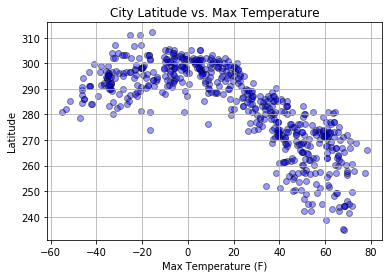

In [10]:
x1 = data_df['Lat'].tolist()
y1 = data_df['Max_Temp'].tolist()

plt.scatter(x1, y1, facecolors="blue", edgecolors="black", alpha = 0.4)
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")

plt.savefig("chart1.png",bbox_inches="tight")

plt.show()

#### Latitude vs. Humidity Plot

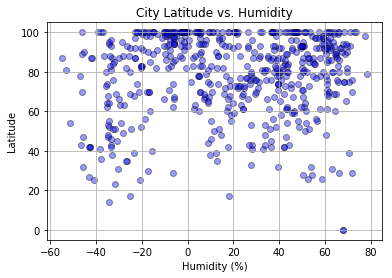

In [11]:
x2 = data_df['Lat'].tolist()
y2 = data_df['Humidity'].tolist()

plt.scatter(x2, y2, facecolors="blue", edgecolors="black", alpha = 0.4)
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")

plt.savefig("chart2.png",bbox_inches="tight")

plt.show()

#### Latitude vs. Cloudiness Plot

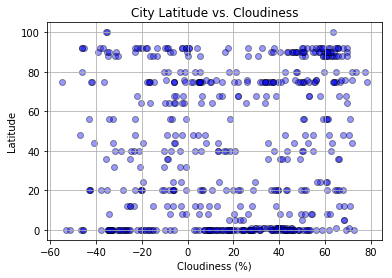

In [12]:
x3 = data_df['Lat'].tolist()
y3 = data_df['Cloudiness'].tolist()

plt.scatter(x3, y3, facecolors="blue", edgecolors="black", alpha = 0.4)
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")

plt.savefig("chart3.png",bbox_inches="tight")

plt.show()

#### Latitude vs. Wind Speed Plot

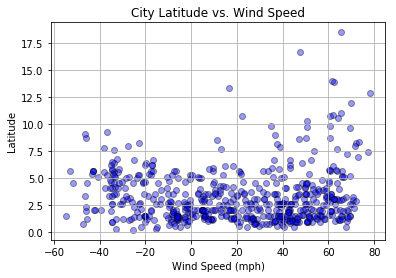

In [13]:
x4 = data_df['Lat'].tolist()
y4 = data_df['Wind_Speed'].tolist()

plt.scatter(x4, y4, facecolors="blue", edgecolors="black", alpha = 0.4)
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")

plt.savefig("chart4.png",bbox_inches="tight")

plt.show()

In [ ]:
#Observations
#1. Closer the city is to 0 latitude, the warmer the temperature
#2. There isn't a significant correlation between latitude and humidity, and latitude and wind speed.
#3. Cloudiness is the heaviest at the equator or at near the north pole. 